# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
'''In data terms, we are asked to create a model to predict the prices of used cars based on different features
like: the car's year, mileage, manufacturer, and model. We would gather data, clean it up, and choose the best 
features to train our model. The goal is to understand which factors have the most impact on car prices so that
the dealership can set better prices and make smarter business decisions.'''

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [42]:
data = pd.read_csv('data/vehicles.csv')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [44]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [45]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [46]:
clean_data = data.dropna()
clean_data.isnull().sum()
clean_data = clean_data[clean_data['price'] != 0]

clean_data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al
337,7315354216,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al
338,7315349921,birmingham,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al


In [47]:
lkfprice = clean_data['price'].max()
print("Lowest price of a car:", lkfprice)

Lowest price of a car: 155000


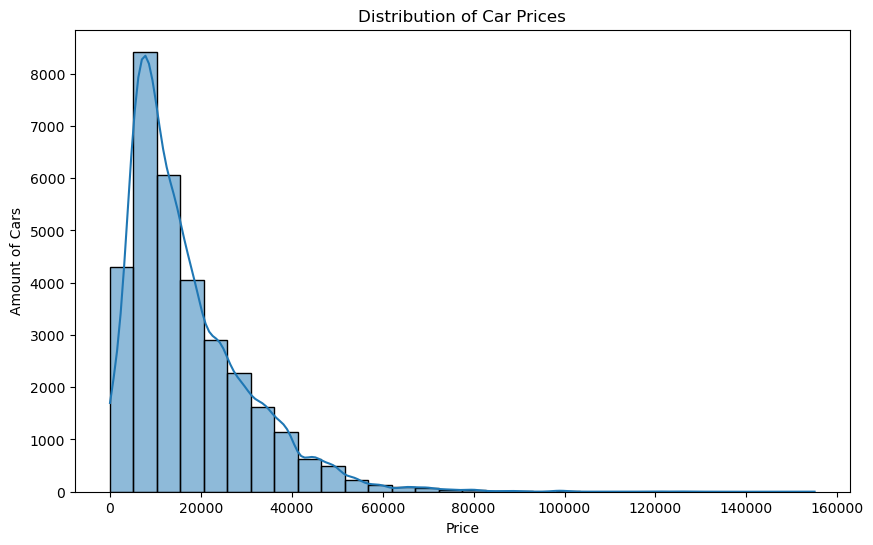

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Amount of Cars')
plt.show()

/Users/neelaiyar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


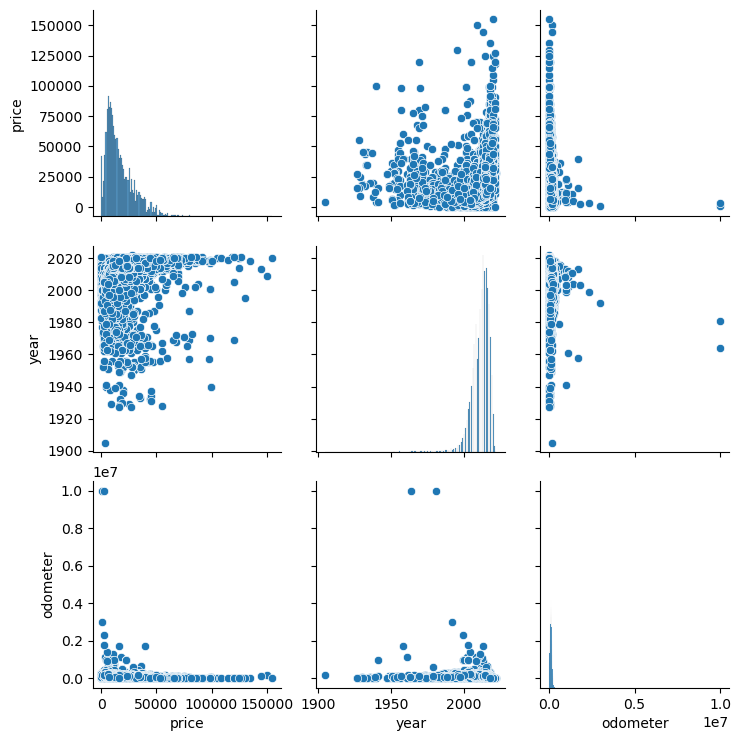

In [49]:
sns.pairplot(clean_data[['price', 'year', 'odometer']])
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [34]:
X = clean_data.drop(['price'], axis=1)
y = clean_data['price']

In [52]:
# Features and target variable
X = clean_data[['year', 'odometer']]
y = clean_data['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train multiple regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print(f'{name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('\n')




Linear Regression:
Mean Squared Error: 158568034.76656482
R-squared: 0.09373562619257547


Ridge Regression:
Mean Squared Error: 158568039.02309188
R-squared: 0.09373560186523333


Lasso Regression:
Mean Squared Error: 158568258.1153178
R-squared: 0.09373434968676497




### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [55]:
'''
Assessment:

Based on our current findings, key features and models perform to the best that it can be. However, ongoing monitoring of market trends 
and refinement of the analysis will ensure its continued relevance and value to the client. Monitoring the prices
is an ongoing siutation but I do believe I have revisited and adjusted the model to the best of its ability to 
assist the dealership.


Hypothesis:

Car age and mileage significantly impact used car prices, with newer cars and those with 
lower mileage commanding higher prices.


'''

'\nHypothesis:\n\nCar age and mileage significantly impact used car prices, with newer cars and those with \nlower mileage commanding higher prices.\n\n'

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
#This graph demonstrates the impact of mileage on used car prices, supporting our finding that cars 
#with lower mileage have higher prices.

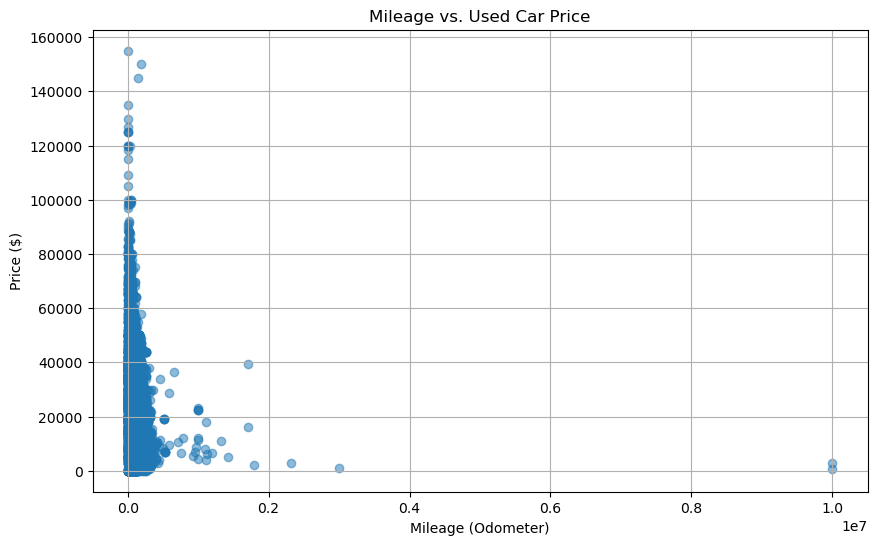

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['odometer'], clean_data['price'], alpha=0.5)
plt.title('Mileage vs. Used Car Price')
plt.xlabel('Mileage (Odometer)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

In [ ]:
#This graph illustrates the relationship between car age and used car prices, confirming our finding that 
#newer cars tend to command higher prices.

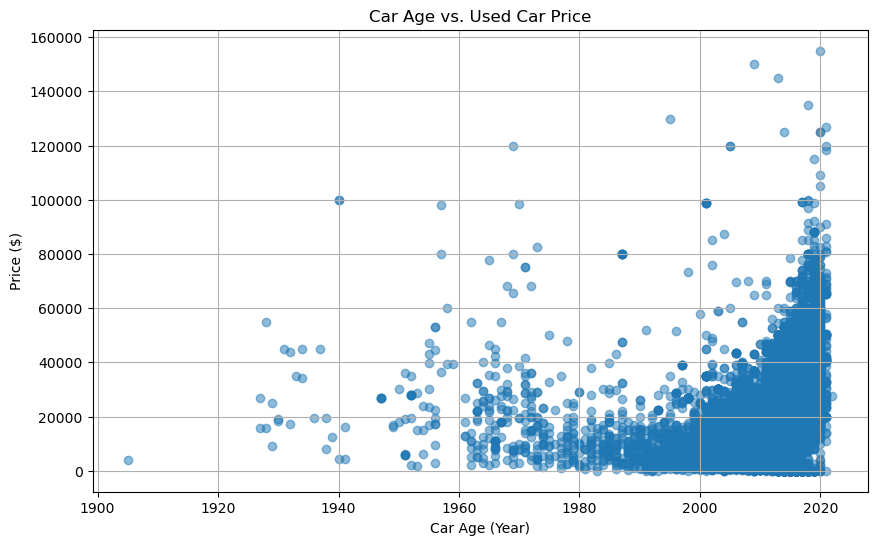

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['year'], clean_data['price'], alpha=0.5)
plt.title('Car Age vs. Used Car Price')
plt.xlabel('Car Age (Year)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

In [ ]:
#This graph showcases how the condition of a car influences its price, reinforcing our finding that 
#well-maintained cars in excellent condition tend to have higher prices compared to those in poorer condition.

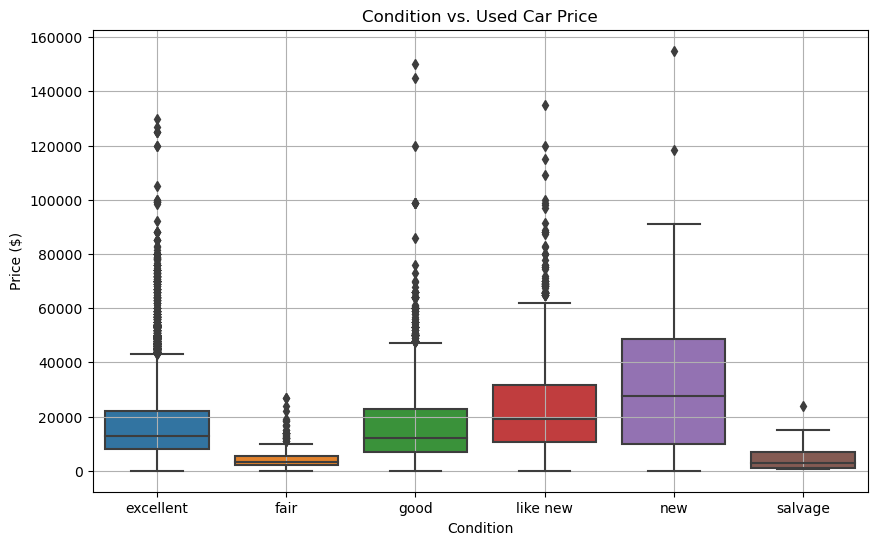

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=clean_data)
plt.title('Condition vs. Used Car Price')
plt.xlabel('Condition')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

In [ ]:
#By comparing prices across different manufacturers, this graph highlights variations in used car prices 
#based on manufacturer, indicating that certain brands may command higher prices in the market.

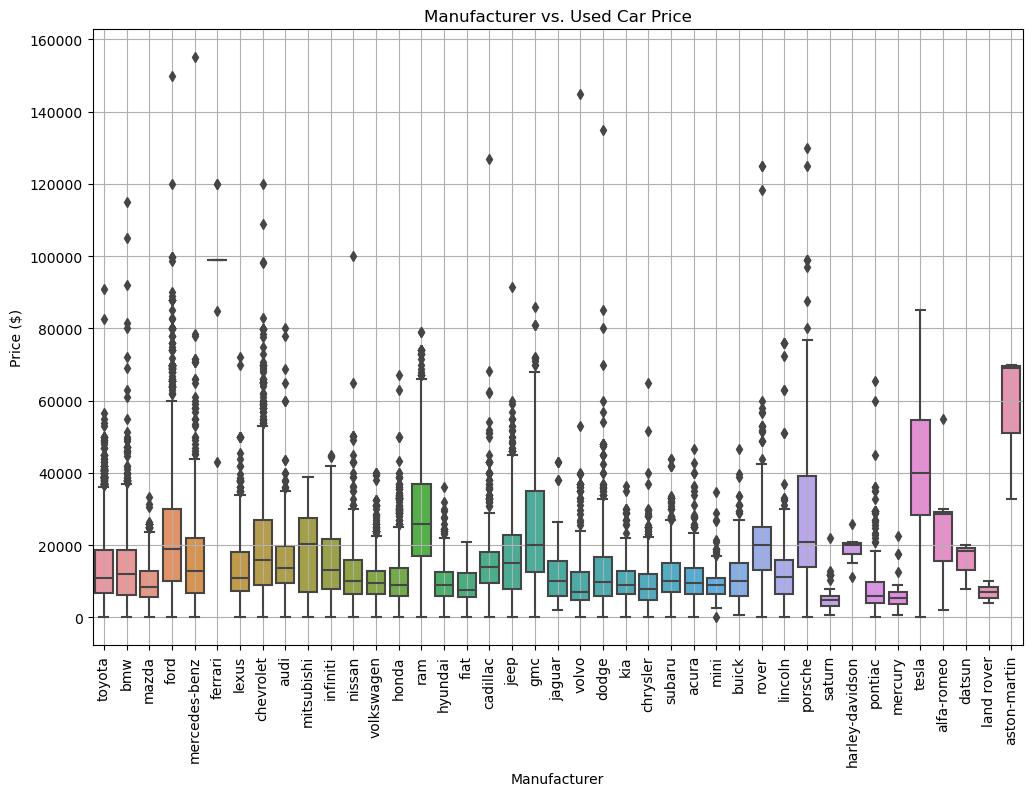

In [60]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='manufacturer', y='price', data=clean_data)
plt.title('Manufacturer vs. Used Car Price')
plt.xlabel('Manufacturer')
plt.ylabel('Price ($)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()